# KMeans v1
v1 uses the dataframe with all the original features

In [37]:
from IPython.display import IFrame
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler

## Import data

In [2]:
df = pd.read_csv("data/clean_audio_features_dataset_curated.csv")

In [3]:
df = df.drop(columns=['Unnamed: 0'])
df

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,loudness,...,key_6,key_7,key_8,key_9,key_10,key_11,time_signature_1,time_signature_3,time_signature_4,time_signature_5
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,0,0.676,0.4610,-6.746,...,0,0,0,0,0,0,0,0,1,0
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,0,0.420,0.1660,-17.235,...,0,0,0,0,0,0,0,0,1,0
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,0,0.438,0.3590,-9.734,...,0,0,0,0,0,0,0,0,1,0
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,0,0.266,0.0596,-18.515,...,0,0,0,0,0,0,0,1,0,0
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,0,0.618,0.4430,-9.681,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34706,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,0,0.172,0.2350,-16.393,...,0,0,0,0,0,0,0,0,0,1
34707,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,0,0.174,0.1170,-18.318,...,0,0,0,0,0,0,0,0,1,0
34708,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,0,0.629,0.3290,-10.895,...,0,0,0,0,0,0,0,0,1,0
34709,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,0,0.587,0.5060,-10.889,...,0,1,0,0,0,0,0,0,1,0


In [4]:
df_model = df.drop(columns=['track_id', 'artists', 'album_name', 'track_name']).copy()
df_model

,popularity,duration_ms,explicit,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,...,key_6,key_7,key_8,key_9,key_10,key_11,time_signature_1,time_signature_3,time_signature_4,time_signature_5
0,73,230666,0,0.676,0.4610,-6.746,0,0.1430,0.0322,0.000001,...,0,0,0,0,0,0,0,0,1,0
1,55,149610,0,0.420,0.1660,-17.235,1,0.0763,0.9240,0.000006,...,0,0,0,0,0,0,0,0,1,0
2,57,210826,0,0.438,0.3590,-9.734,1,0.0557,0.2100,0.000000,...,0,0,0,0,0,0,0,0,1,0
3,71,201933,0,0.266,0.0596,-18.515,1,0.0363,0.9050,0.000071,...,0,0,0,0,0,0,0,1,0,0
4,82,198853,0,0.618,0.4430,-9.681,1,0.0526,0.4690,0.000000,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34706,21,384999,0,0.172,0.2350,-16.393,1,0.0422,0.6400,0.928000,...,0,0,0,0,0,0,0,0,0,1
34707,22,385000,0,0.174,0.1170,-18.318,0,0.0401,0.9940,0.976000,...,0,0,0,0,0,0,0,0,1,0
34708,22,271466,0,0.629,0.3290,-10.895,0,0.0420,0.8670,0.000000,...,0,0,0,0,0,0,0,0,1,0
34709,41,283893,0,0.587,0.5060,-10.889,1,0.0297,0.3810,0.000000,...,0,1,0,0,0,0,0,0,1,0


## Scaler

In [5]:
minmax = MinMaxScaler()

In [6]:
minmax.fit(df_model)
X_scaled = minmax.transform(df_model)

In [7]:
X_scaled

array([[0.73      , 0.06415858, 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.55      , 0.03976777, 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.57      , 0.05818846, 0.        , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.22      , 0.07643583, 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.41      , 0.08017528, 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.22      , 0.06751677, 0.        , ..., 0.        , 1.        ,
        0.        ]])

## KMeans model metrics

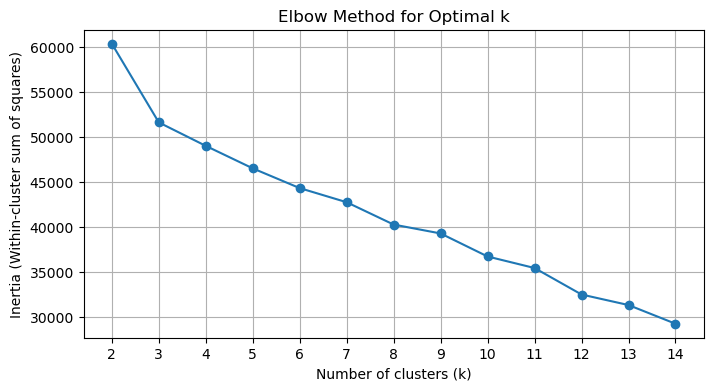

In [8]:
inertias = []
k_range = range(2, 15)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)


plt.figure(figsize=(8, 4))
plt.plot(k_range, inertias, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia (Within-cluster sum of squares)')
plt.title('Elbow Method for Optimal k')
plt.xticks(k_range)
plt.grid(True)

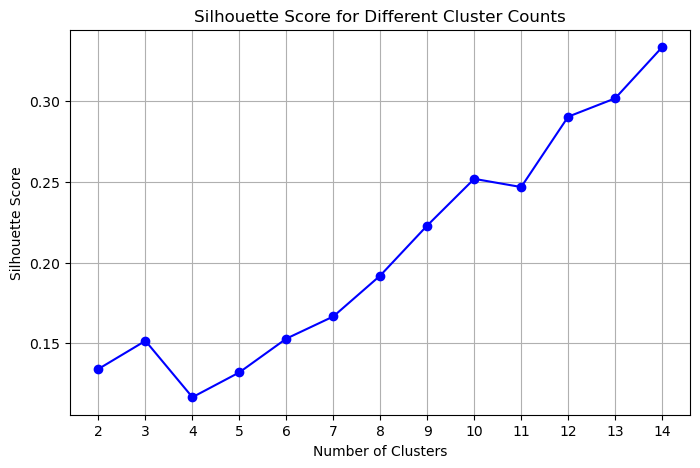

In [9]:
cluster_range = range(2, 15)
silhouette_scores = []
for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, cluster_labels)
    silhouette_scores.append(score)
plt.figure(figsize=(8, 5))
plt.plot(cluster_range, silhouette_scores, marker='o', linestyle='-', color='b')
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score for Different Cluster Counts")
plt.xticks(cluster_range)
plt.grid(True)
plt.show()

## Model training n_clusters = 12

In [10]:
kmeans = KMeans(n_clusters=12, random_state=42)

In [11]:
kmeans.fit(X_scaled)

KMeans(n_clusters=12, random_state=42)

### Model prediction

In [13]:
df['cluster'] = kmeans.predict(X_scaled)

In [16]:
df['cluster'].value_counts()

cluster
4     5025
6     3502
5     3396
11    3008
1     2945
3     2908
0     2789
8     2671
7     2382
2     2200
9     1995
10    1890
Name: count, dtype: int64

### Check clusters

In [36]:
df.select_dtypes('number').groupby('cluster').mean()

,popularity,duration_ms,explicit,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,...,key_6,key_7,key_8,key_9,key_10,key_11,time_signature_1,time_signature_3,time_signature_4,time_signature_5
cluster,,,,,,,,,,,,,,,,,,,,,
0,32.419505,229500.159555,0.024023,0.434460,0.416011,-11.540919,0.702761,0.056120,0.576721,0.198297,...,0.068842,0.132305,0.049480,0.099319,0.071710,0.057010,0.000000,0.999641,0.000000,0.000359
1,37.984041,238407.184720,0.062479,0.567012,0.651310,-7.443157,0.789134,0.066485,0.271595,0.091125,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.004754,0.000000,0.984720,0.010526
2,37.752727,234115.872273,0.082273,0.603591,0.671642,-7.075819,0.511364,0.078137,0.243474,0.113532,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.009091,0.000000,0.975000,0.015909
3,37.425034,230318.486245,0.105227,0.603233,0.683021,-6.934868,0.658184,0.083112,0.234869,0.100474,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.009285,0.000000,0.976616,0.014099
4,36.603383,232678.462886,0.080796,0.606061,0.684200,-6.649676,0.623284,0.072930,0.233601,0.076788,...,0.000000,0.000000,0.387861,0.000000,0.000000,0.000000,0.004179,0.000000,0.988259,0.007562
5,36.154594,238572.464075,0.072144,0.589710,0.667303,-7.290082,0.781508,0.074318,0.253305,0.104334,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.006478,0.000000,0.984393,0.009128
6,34.820103,230450.698172,0.062536,0.592068,0.644533,-7.505101,0.793832,0.064462,0.280107,0.091851,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003998,0.000000,0.985722,0.010280
7,38.580185,237944.473552,0.068430,0.574722,0.658222,-7.529063,0.454660,0.070649,0.267606,0.099289,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.004618,0.000000,0.985306,0.010076
8,36.840509,229107.247098,0.084613,0.608540,0.689384,-6.961144,0.454511,0.083506,0.216150,0.104001,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.004118,0.000000,0.987271,0.008611


In [82]:
def play_song(track_id):
    return IFrame(src="https://open.spotify.com/embed/track/"+track_id,
       width="320",
       height="80",
       frameborder="0",
       allowtransparency="true",
       allow="encrypted-media",
      )

def play_random_from_cluster(dataframe, cluster_number):
    track_id = df[df['cluster']==cluster_number].sample()['track_id'].values[0]
    return play_song(track_id)

In [83]:
play_random_from_cluster(df, 5)

## Model training n_clusters = 3

In [77]:
kmeans = KMeans(n_clusters=3, random_state=42)

In [78]:
kmeans.fit(X_scaled)

KMeans(n_clusters=3, random_state=42)

### Model prediction

In [85]:
df_kmeans3 = pd.read_csv("data/clean_audio_features_dataset_curated.csv")
df_kmeans3 = df_kmeans3.drop(columns=['Unnamed: 0'])
df_kmeans3['cluster'] = kmeans.predict(X_scaled)

In [86]:
df_kmeans3['cluster'].value_counts()

cluster
2    20131
1    11255
0     3325
Name: count, dtype: int64

### Check clusters

In [87]:
df_kmeans3.select_dtypes('number').groupby('cluster').mean()

,popularity,duration_ms,explicit,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,...,key_6,key_7,key_8,key_9,key_10,key_11,time_signature_1,time_signature_3,time_signature_4,time_signature_5
cluster,,,,,,,,,,,,,,,,,,,,,
0,31.956692,226970.108571,0.025263,0.427828,0.393271,-12.089208,0.717594,0.058027,0.611355,0.214893,...,0.076391,0.125113,0.051429,0.094135,0.067669,0.056541,0.067669,0.838496,0.000000,0.093835
1,37.900844,231597.612350,0.090004,0.608528,0.678331,-7.408156,0.000000,0.082705,0.238985,0.150817,...,0.096046,0.069658,0.046113,0.102799,0.087161,0.130253,0.003732,0.000000,0.986761,0.009507
2,35.408673,233119.944563,0.062391,0.571951,0.629599,-7.909824,1.000000,0.067242,0.306005,0.111924,...,0.056132,0.134916,0.078486,0.096071,0.053500,0.061050,0.001441,0.000000,0.996324,0.002235


In [97]:
play_random_from_cluster(df_kmeans3, 0)